# Glutarylation

## Global Imports

In [1]:
!pip install lightgbm


import numpy as np
# import seaborn as sns
# sns.set(color_codes=True)
import matplotlib.pyplot as plt
import pandas as pd

from numpy.random import seed
# from tensorflow import set_random_seed

# from keras.layers import Input, Dropout
# from keras.layers.core import Dense 
# from keras.models import Model, Sequential, load_model
# from keras import regularizers

seed(10)
# set_random_seed(10)

## Load Data

In [2]:
fileName = 'glutarylation.csv'
dataset = pd.read_csv(fileName, header=None, engine='python')
dataset.shape

(4364, 211)

In [3]:
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,23.0,6.300000e-16,23.0,-8.647227,9.867069,23.0,-8.278340,2.703090,15.211842,23.0,...,-12.369339,16.386712,13.998684,-7.812220,-11.009154,4.470450,4.763850,4.986665,23.0,1
1,23.0,-3.550338e+00,23.0,-9.896370,9.177542,23.0,-9.166313,1.913047,13.718623,23.0,...,-10.472116,18.884648,8.736984,-5.360441,-11.666483,6.287132,3.863792,8.783842,23.0,1
2,23.0,1.394272e+00,23.0,0.698437,10.850596,23.0,-3.441393,2.942060,17.637870,23.0,...,-8.168240,17.482967,6.659979,-5.573947,-7.677254,5.459386,-3.216441,4.013843,23.0,1
3,23.0,-2.885842e+00,23.0,-8.250997,10.130371,23.0,-6.178288,-0.036581,17.309180,23.0,...,-10.393515,18.533821,13.125996,-8.804041,-8.914811,8.276212,4.012382,3.895518,23.0,1
4,23.0,-2.390327e+00,23.0,-3.606932,10.884266,23.0,0.297962,7.847956,17.518974,23.0,...,-12.460686,14.941014,8.594728,-5.991066,-9.230247,4.841879,3.385305,3.408195,23.0,1


In [4]:
dataset.isnull().any().any()

False

In [5]:
# from sklearn.preprocessing import Imputer 
# imputer= Imputer(missing_values='NaN', strategy='mean' , axis = 0) 
# imputer.fit(dataset)

dataset.fillna(dataset.mean(), inplace=True)

In [6]:
shortCol = []
columns = dataset.columns.tolist()
for i in columns:
  if(dataset[i].nunique() != 1):
    shortCol.append(i)
    #print(i, ": ", dataset[i].nunique())

In [7]:
ttl_data = dataset.iloc[:, shortCol].values
np.random.shuffle(ttl_data)
ttl_data.shape

(4364, 211)

In [8]:
ttl_data[ttl_data[:, -1] == 1].shape

(2181, 211)

In [9]:
ttl_data[ttl_data[:, -1] == 0].shape

(2183, 211)

## Separate Positives & Negatives

In [10]:
pos = ttl_data[ttl_data[:, -1] == 1]
np.random.shuffle(pos)
neg = ttl_data[ttl_data[:, -1] == 0]
np.random.shuffle(neg)

In [11]:
### auto-encoder data ###

# tstSize = 150
# p_test = pos[0:tstSize, ...]
# n_test, n_train = neg[0:tstSize, ...], neg[tstSize:, ...]
# test = np.vstack((p_test, n_test))
# np.random.shuffle(test)
# X_train, X_test, y_train, y_test = n_train[:, :-1], test[:, :-1], n_train[:, -1], test[:, -1]

## Train-Test Split

In [12]:
tstSize = 500
p_test, p_train = pos[0:tstSize, ...], pos[tstSize:, ...]
n_test, n_train = neg[0:tstSize, ...], neg[tstSize:, ...]
train, test = np.vstack((p_train, n_train)), np.vstack((p_test, n_test))
np.random.shuffle(train)
np.random.shuffle(test)
X_train, X_test, y_train, y_test = train[:, :-1], test[:, :-1], train[:, -1], test[:, -1]

In [13]:
print(y_train.shape)
print(y_train[y_train == 1].shape)
print(y_train[y_train == 0].shape)

print('-'*60)

print(y_test.shape)
print(y_test[y_test == 1].shape)
print(y_test[y_test == 0].shape)

(3364,)
(1681,)
(1683,)
------------------------------------------------------------
(1000,)
(500,)
(500,)


## Independent Test Load;

In [14]:
fileName1 = 'Independent_Rf.csv'
testFeat = pd.read_csv(fileName1, header=None, engine='python')

In [15]:
ttl_data = testFeat.values
np.random.shuffle(ttl_data)
ttl_data.shape

(247, 211)

In [16]:
X_test, y_test = ttl_data[:, :-1], ttl_data[:, -1]

In [17]:
print(X_test.shape)
print('-'*60)

print(y_test.shape)
print(y_test[y_test == 1].shape)
print(y_test[y_test == 0].shape)

(247, 210)
------------------------------------------------------------
(247,)
(44,)
(203,)


## Scaling Data

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Balance Data

In [19]:
#!pip install imblearn
from imblearn.under_sampling import ClusterCentroids
X_train_res, y_train_res = ClusterCentroids(sampling_strategy='auto').fit_resample(X_train, y_train)

Using TensorFlow backend.
/Users/wakilahmad/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1680) found smaller than n_clusters (1681). Possibly due to duplicate points in X.
  return_n_iter=True)


In [20]:
# from imblearn.over_sampling import SVMSMOTE
# X_train_res, y_train_res = SVMSMOTE().fit_resample(X_train, y_train)

In [21]:
# from imblearn.under_sampling import TomekLinks
# tl = TomekLinks(sampling_strategy='all')
# X_train_res, y_train_res = tl.fit_resample(X_train_res, y_train_res)

In [22]:
print(y_train_res.shape)
print(y_train_res[y_train_res == 1].shape)
print(y_train_res[y_train_res == 0].shape)

(3362,)
(1681,)
(1681,)


## XGBoost

In [23]:
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier, XGBRFRegressor

regr = XGBRegressor(n_estimators=300)
regr.fit(X_train_res, y_train_res)

y_pred = regr.predict(X_test)
y_pred = np.where(y_pred > 0.50, 1, 0)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

print('-'*60)

clf = XGBClassifier()
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

print('-'*60)

[16:37:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
accuracy:  0.8380566801619433

f1_score:  0.28571428571428575

Confusion Matrix
[[199   4]
 [ 36   8]]
------------------------------------------------------------
accuracy:  0.8178137651821862

f1_score:  0.18181818181818182

Confusion Matrix
[[197   6]
 [ 39   5]]
------------------------------------------------------------


## LightGBM

In [24]:
from lightgbm import LGBMRegressor, LGBMClassifier

regr = LGBMRegressor(num_leaves=31, n_estimators=40, learning_rate=0.1)
regr.fit(X_train_res, y_train_res)

y_pred = regr.predict(X_test)
y_pred = np.where(y_pred > 0.50, 1, 0)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

print('-'*60)

clf = LGBMClassifier(num_leaves=31, n_estimators=40, learning_rate=0.1)
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

/Users/wakilahmad/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


accuracy:  0.8380566801619433

f1_score:  0.393939393939394

Confusion Matrix
[[194   9]
 [ 31  13]]
------------------------------------------------------------
accuracy:  0.8380566801619433

f1_score:  0.3548387096774194

Confusion Matrix
[[196   7]
 [ 33  11]]


## AutoEncoder

In [25]:
# act_func = 'elu'


# model=Sequential()

# model.add(Dense(10,activation=act_func,
#                 kernel_initializer='glorot_uniform',
#                 kernel_regularizer=regularizers.l2(0.0),
#                 input_shape=(X_train.shape[1],)
#                )
#          )

# model.add(Dense(2,activation=act_func,
#                 kernel_initializer='glorot_uniform'))

# model.add(Dense(10,activation=act_func,
#                 kernel_initializer='glorot_uniform'))

# model.add(Dense(X_train.shape[1],
#                 kernel_initializer='glorot_uniform'))

# model.compile(loss='mse',optimizer='adam')


# NUM_EPOCHS=100
# BATCH_SIZE=16

In [26]:
# history=model.fit(np.array(X_train),np.array(X_train),
#                   batch_size=BATCH_SIZE, 
#                   epochs=NUM_EPOCHS,
#                   validation_split=0.05,
#                   verbose = 1)

# plt.plot(history.history['loss'],
#          'b',
#          label='Training loss')
# plt.plot(history.history['val_loss'],
#          'r',
#          label='Validation loss')
# plt.legend(loc='upper right')
# plt.xlabel('Epochs')
# plt.ylabel('Loss, [mse]')
# plt.ylim([0,.1])
# plt.show()

In [27]:
# X_train = pd.DataFrame(X_train, columns=None)
# X_test = pd.DataFrame(X_test, columns=None)
# X_pred = model.predict(np.array(X_train))
# X_pred = pd.DataFrame(X_pred, 
#                       columns=X_train.columns)
# X_pred.index = X_train.index

# scored = pd.DataFrame(index=X_train.index)
# scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
# plt.figure()
# sns.distplot(scored['Loss_mae'],
#              bins = 10, 
#              kde= True,
#             color = 'blue');
# plt.xlim([0.3,6.7])

In [28]:
# X_pred = model.predict(np.array(X_test))
# X_pred = pd.DataFrame(X_pred, columns=None)
# X_pred.index = X_test.index

# scored = pd.DataFrame(index=X_test.index)
# scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
# lo_thrs = 2.4
# up_thrs = 4
# scored['Anomaly'] = ((scored['Loss_mae'] < lo_thrs)|(scored['Loss_mae'] > up_thrs))
# scored.head(10)

In [29]:
# X_pred_train = model.predict(np.array(X_train))
# X_pred_train = pd.DataFrame(X_pred_train, 
#                       columns=X_train.columns)
# X_pred_train.index = X_train.index

# scored_train = pd.DataFrame(index=X_train.index)
# scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
# scored_train['Threshold'] = 0.9
# scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
# scored = pd.concat([scored_train, scored])

In [30]:
# scored.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])

In [31]:
# y_pred = scored.iloc[:, -1].values

In [32]:
# from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
# acc = accuracy_score(y_test, y_pred)
# print("accuracy: ", acc)
# print()

# f1 = f1_score(y_test, y_pred, average='binary')
# print("f1_score: ", f1)
# print()

# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix")
# print(cm)

## Feature Importances

/Users/wakilahmad/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


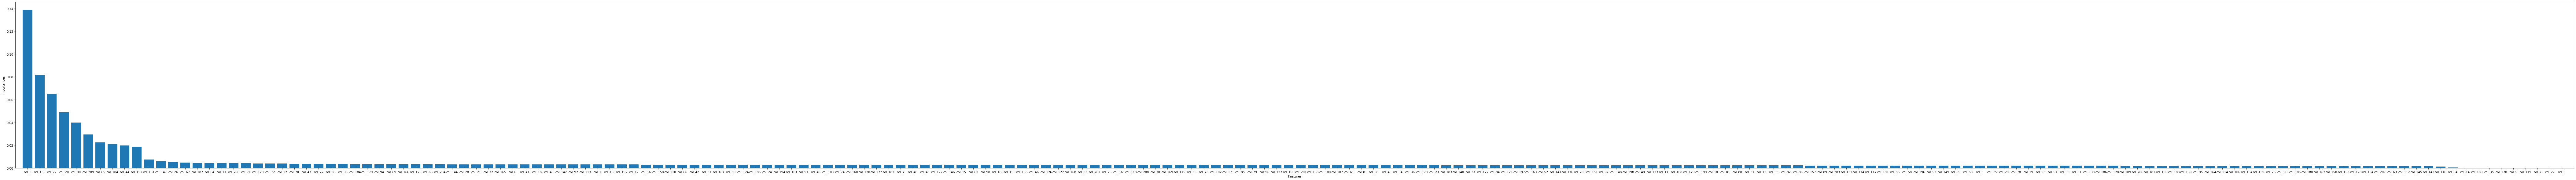

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
feat_importances = model.feature_importances_
indices = np.argsort(feat_importances)[::-1]
plt.figure(figsize=(150, 10))
plt.bar(range(X_train.shape[1]), feat_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), ["col_"+str(i) for i in indices])
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importances')
plt.savefig("Feature Importances", bbox_inches='tight')
plt.show()

In [34]:

# from sklearn.model_selection import KFold
# kf = KFold(n_splits=10)
# kf.get_n_splits(X)

# for train_index, test_index in kf.split(X):
#   X_train, X_test = X[train_index], X[test_index]
#   y_train, y_test = y[train_index], y[test_index]

In [35]:
# X, y = ttl_data[:, :-1], ttl_data[:, -1]

# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# classifier = RandomForestClassifier(max_depth=2, random_state=10, n_estimators=300)
# classifier.fit(X, y)

# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
# print(accuracies)
# print(accuracies.mean())
# print(accuracies.std())

# Cross Validation

## MLP neural_network

In [36]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=1, max_iter=1000, learning_rate='constant', learning_rate_init=0.001)
clf.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

***CROSS VALIDATION***
[0.80473373 0.80654762 0.78869048 0.77083333 0.79761905 0.8422619
 0.81845238 0.82142857 0.82738095 0.83333333]
accuracy:  0.811128134685827
0.020634351651037122


In [37]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8218623481781376

f1_score:  0.37142857142857144

Confusion Matrix
[[190  13]
 [ 31  13]]


## ExtraTrees

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

***CROSS VALIDATION***
[0.78994083 0.80059524 0.77380952 0.80654762 0.82142857 0.82738095
 0.80952381 0.83333333 0.80952381 0.8125    ]
accuracy:  0.8084583685545222
0.016651068576569037


In [39]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8461538461538461

f1_score:  0.4242424242424242

Confusion Matrix
[[195   8]
 [ 30  14]]


## AdaBoost

In [40]:

from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(n_estimators=300)
boost.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = boost, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

***CROSS VALIDATION***
[0.81360947 0.79464286 0.79464286 0.79166667 0.83035714 0.8125
 0.83928571 0.82440476 0.80357143 0.79166667]
accuracy:  0.8096347562693718
0.016379072451921415


In [41]:
y_pred = boost.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8016194331983806

f1_score:  0.24615384615384614

Confusion Matrix
[[190  13]
 [ 36   8]]


## XGBOOST

In [42]:
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier, XGBRFRegressor

clf = XGBClassifier()
clf.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())


***CROSS VALIDATION***
[0.81065089 0.81845238 0.81547619 0.80952381 0.82738095 0.84821429
 0.85119048 0.86309524 0.83630952 0.83035714]
accuracy:  0.8310650887573964
0.01746280406529711


In [43]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8178137651821862

f1_score:  0.18181818181818182

Confusion Matrix
[[197   6]
 [ 39   5]]


## Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
#class_weight = dict({1:1.9, 2:35, 3:180})
#X_train_res, y_train_res = make_classification(n_samples=60, n_features=210,
                           #n_informative=20, n_redundant=0,
                           #random_state=0, shuffle=False)
clf = RandomForestClassifier(bootstrap=True,
            criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300,
            oob_score=False,
            random_state=20,
            verbose=0, warm_start=False)
        
#clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=300)
clf.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10, scoring='accuracy')
print("***CROSS VALIDATION***")
print(accuracies)
print("mean.accuracy: ", accuracies.mean())
print(accuracies.std())


***CROSS VALIDATION***
[0.79881657 0.82738095 0.81547619 0.80952381 0.82142857 0.85416667
 0.8422619  0.85714286 0.8452381  0.8422619 ]
mean.accuracy:  0.831369752042829
0.018755956585484287


In [45]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8218623481781376

f1_score:  0.04347826086956522

Confusion Matrix
[[202   1]
 [ 43   1]]


## LightGBM

In [46]:
from lightgbm import LGBMRegressor, LGBMClassifier

clf = LGBMClassifier(num_leaves=31, n_estimators=40, learning_rate=0.1)
clf.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

***CROSS VALIDATION***
[0.79585799 0.80059524 0.78571429 0.80952381 0.82738095 0.83630952
 0.82440476 0.85119048 0.82440476 0.81845238]
accuracy:  0.817383417864187
0.018736864945217584


In [47]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8380566801619433

f1_score:  0.3548387096774194

Confusion Matrix
[[196   7]
 [ 33  11]]


## Init Scorers

In [48]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_curve, auc, matthews_corrcoef
from imblearn.metrics import sensitivity_score, specificity_score

curves = []

def plt_curve(lst, name):
  plt.figure(figsize=(20,10))
  
  for idx, itm in enumerate(lst):
    fpr, tpr = itm
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (AUC = %0.2f)' % (idx+1, auc(fpr, tpr)))
    
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  figName = name + '.png'
  plt.savefig(figName, bbox_inches='tight')
  plt.show()

def roc_plt(y_true, y_score):
  fpr, tpr, _ = roc_curve(y_true, y_score, pos_label=1)
  curves.append([fpr, tpr])
  return 1

metrs = {
         'roc_plt': make_scorer(roc_plt, needs_proba=True), 
         'matthews_corrcoef': make_scorer(matthews_corrcoef), 
         'sensitivity_score': make_scorer(sensitivity_score), 
         'specificity_score': make_scorer(specificity_score)
        }

## XGBoost CV Scores

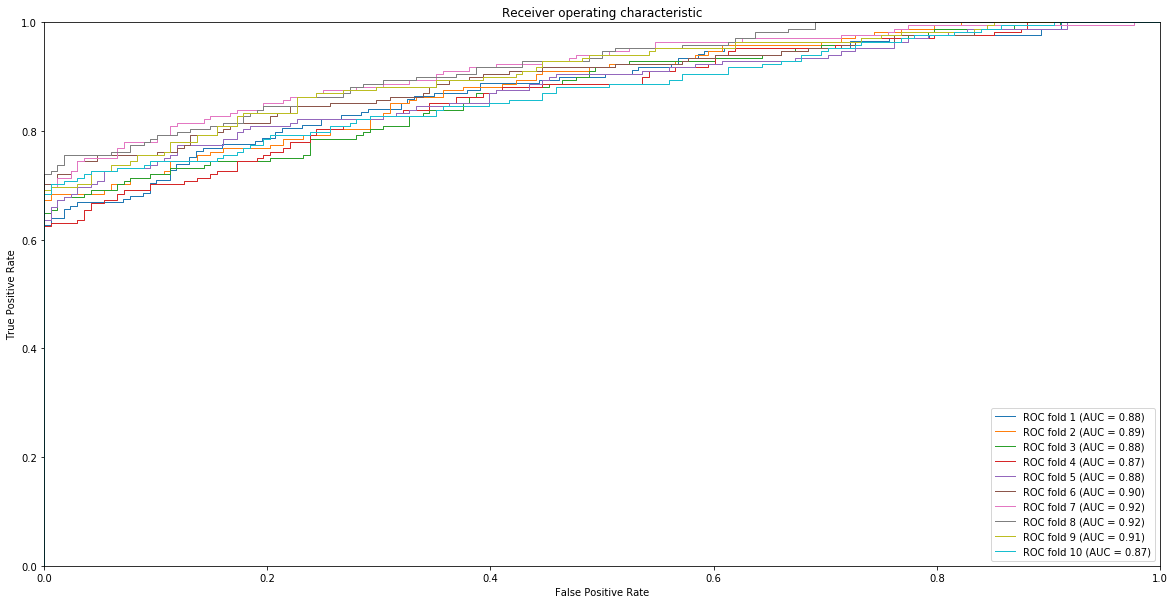

***CROSS VALIDATION***
XGBoost


{'fit_time': array([12.20219016, 10.23537993,  6.23585725,  6.38325787,  6.05304289,
         5.89844203,  6.33295298,  6.03838229,  6.01367879,  6.05227876]),
 'score_time': array([0.02349687, 0.01550794, 0.01448083, 0.01458526, 0.01441479,
        0.0146358 , 0.0237    , 0.01378393, 0.01371789, 0.01443124]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.64798768, 0.65119332, 0.6496347 , 0.64597519, 0.68324299,
        0.71205251, 0.72317825, 0.7500063 , 0.68955016, 0.67384198]),
 'test_sensitivity_score': array([0.66863905, 0.71428571, 0.69642857, 0.66666667, 0.68452381,
        0.74404762, 0.73214286, 0.73809524, 0.72619048, 0.73214286]),
 'test_specificity_score': array([0.95266272, 0.92261905, 0.93452381, 0.95238095, 0.9702381 ,
        0.95238095, 0.9702381 , 0.98809524, 0.94642857, 0.92857143])}

In [49]:
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier, XGBRFRegressor
classifier = XGBClassifier()

curves = []

scores = cross_validate(classifier, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "XGBoost CV")
print("***CROSS VALIDATION***")
print("XGBoost")
scores
#scores['roc']=curves

## AdaBoost CV Scores

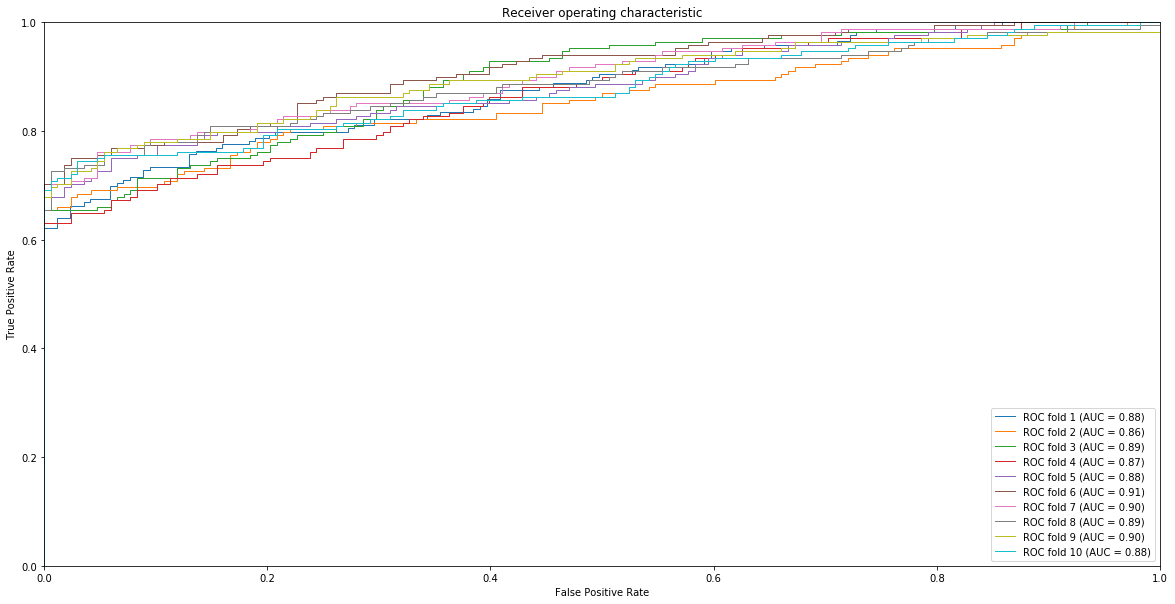

***CROSS VALIDATION***
AdaBoost


{'fit_time': array([20.29195189, 28.88667393, 24.45270228, 32.79356408, 26.75182271,
        24.51296401, 23.63491488, 23.10028791, 23.04167795, 23.03881335]),
 'score_time': array([0.30106783, 0.75097299, 0.42347765, 0.5762291 , 0.75665998,
        0.70867777, 0.36992717, 0.43438125, 0.38092589, 0.36675572]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.63122081, 0.59105794, 0.59164873, 0.59044716, 0.6649807 ,
        0.62527699, 0.68250015, 0.65020478, 0.60718588, 0.58399584]),
 'test_sensitivity_score': array([0.75739645, 0.75595238, 0.75      , 0.71428571, 0.77380952,
        0.79761905, 0.78571429, 0.79166667, 0.79761905, 0.76785714]),
 'test_specificity_score': array([0.86982249, 0.83333333, 0.83928571, 0.86904762, 0.88690476,
        0.82738095, 0.89285714, 0.85714286, 0.80952381, 0.81547619])}

In [50]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=300)

curves = []

scores = cross_validate(classifier, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "AdaBoost CV")
print("***CROSS VALIDATION***")
print("AdaBoost")
scores
#scores['roc']=curves

## RandomForest CV Scores

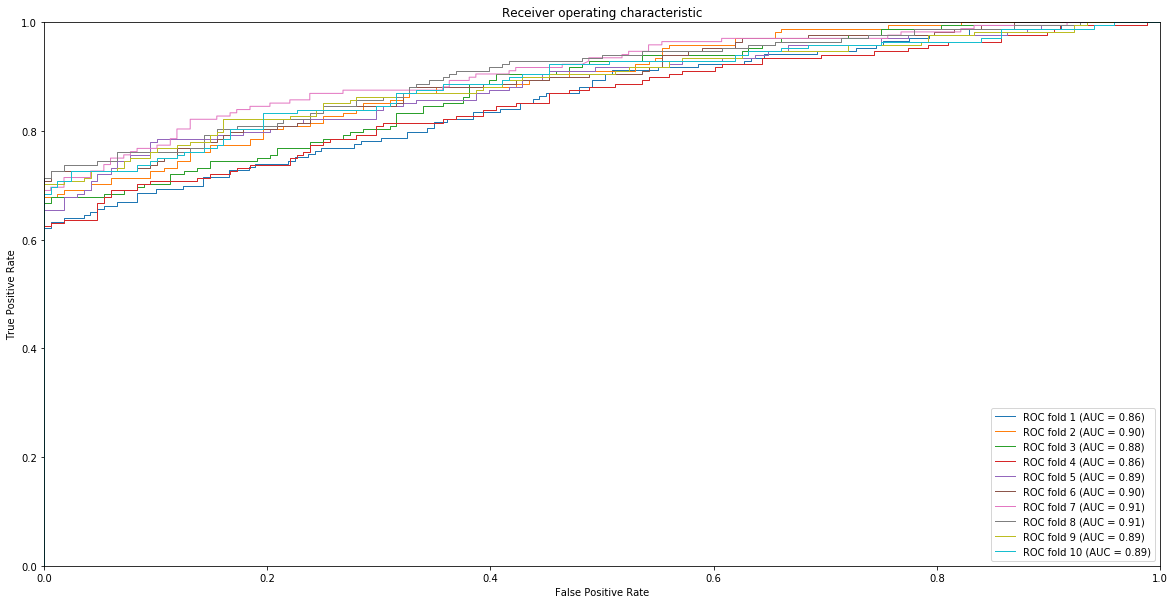

***CROSS VALIDATION***
RandomForest


{'fit_time': array([1.98106813, 2.03729296, 2.02332997, 1.88173294, 1.96116662,
        1.86628079, 4.11130214, 2.20425105, 1.94815898, 1.93111515]),
 'score_time': array([0.12505484, 0.13466716, 0.13184476, 0.17577696, 0.12157822,
        0.11959004, 0.35237885, 0.13118005, 0.12607694, 0.12698603]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.66666667, 0.71184721, 0.6882472 , 0.66953406, 0.67419986,
        0.71659857, 0.71659857, 0.74535599, 0.71184721, 0.70237692]),
 'test_sensitivity_score': array([0.61538462, 0.67261905, 0.64285714, 0.61904762, 0.625     ,
        0.67857143, 0.67857143, 0.71428571, 0.67261905, 0.66071429]),
 'test_specificity_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [51]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=42, n_estimators=300)

curves = []

scores = cross_validate(classifier, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "RandomForest CV")
print("***CROSS VALIDATION***")
print("RandomForest")
scores
#scores['roc']=curves

## LightGBM CV Scores

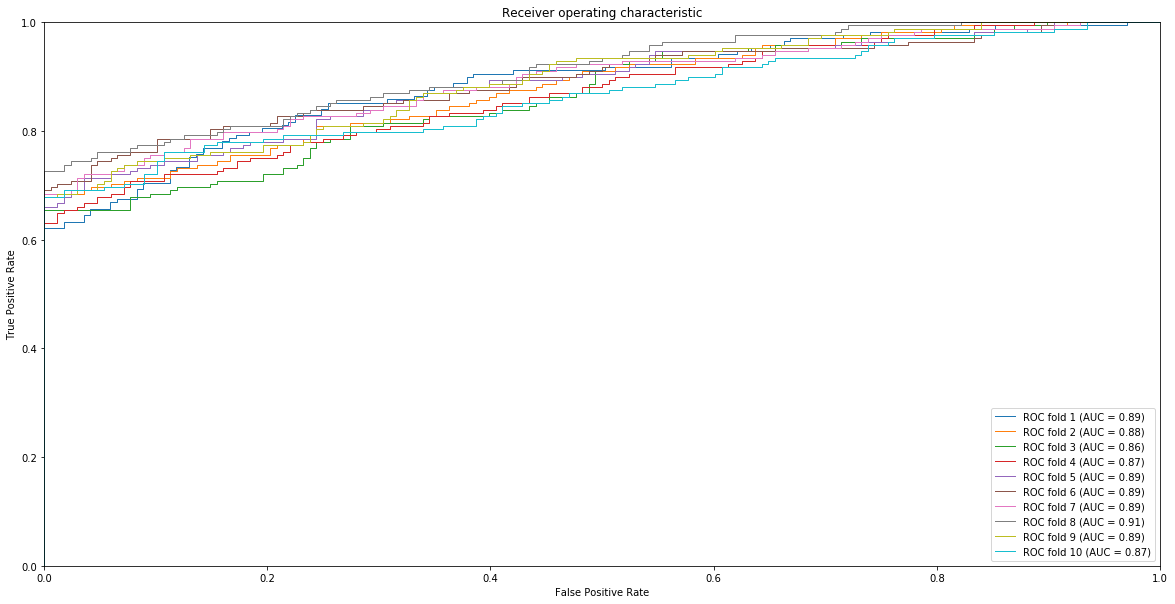

***CROSS VALIDATION***
LightGBM


{'fit_time': array([1.28014684, 1.31367493, 1.41291022, 1.28025913, 1.10727286,
        1.37820888, 1.16678309, 1.11508298, 1.18002415, 1.29226184]),
 'score_time': array([0.01403713, 0.01008892, 0.01382399, 0.010005  , 0.0096972 ,
        0.01442289, 0.01272798, 0.01031899, 0.01427197, 0.00993204]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.60993755, 0.61035269, 0.5820855 , 0.64143782, 0.68077858,
        0.68019239, 0.65869745, 0.71722253, 0.65735449, 0.64529294]),
 'test_sensitivity_score': array([0.67455621, 0.71428571, 0.69047619, 0.67857143, 0.69047619,
        0.76190476, 0.73809524, 0.75      , 0.74404762, 0.73809524]),
 'test_specificity_score': array([0.91715976, 0.88690476, 0.88095238, 0.94047619, 0.96428571,
        0.91071429, 0.91071429, 0.95238095, 0.9047619 , 0.89880952])}

In [52]:
from lightgbm import LGBMRegressor, LGBMClassifier
classifier = LGBMClassifier(num_leaves=31, n_estimators=40, learning_rate=0.1)

curves = []

scores = cross_validate(classifier, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "LightGBM CV")
print("***CROSS VALIDATION***")
print("LightGBM")
scores
#scores['roc']=curves

## MLP CV Scores

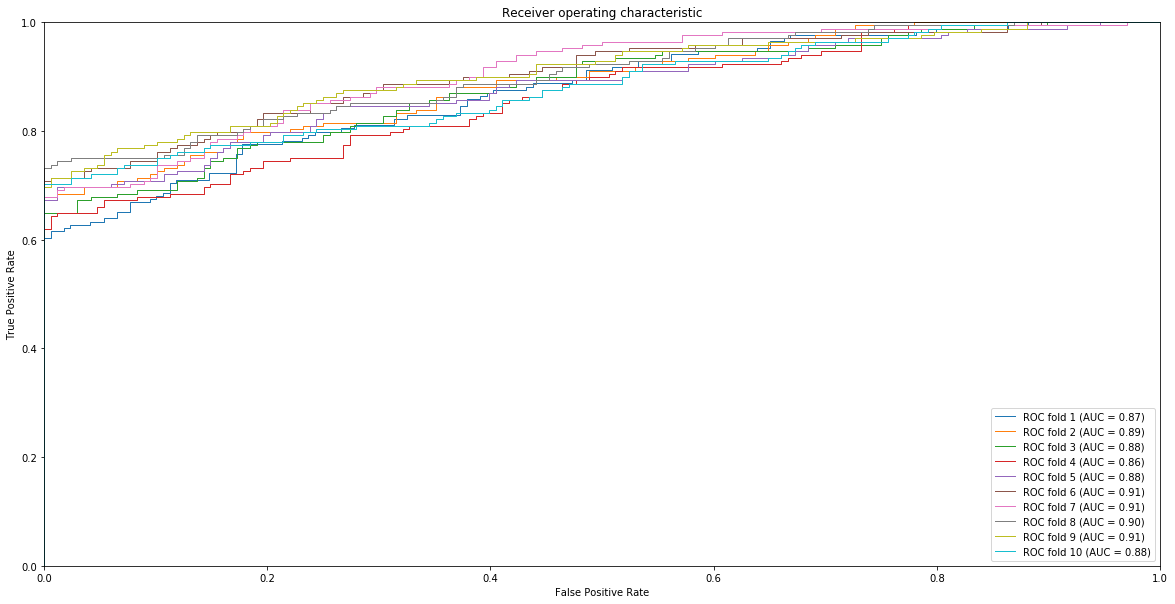

***CROSS VALIDATION***
Multi-Layer Perceptron


{'fit_time': array([3.96491694, 3.97176504, 2.92814636, 4.22938299, 3.84618402,
        3.67954206, 4.47465706, 2.82901001, 3.64036179, 4.27681088]),
 'score_time': array([0.00618505, 0.00672102, 0.00636268, 0.01484418, 0.00628924,
        0.00584602, 0.0075891 , 0.00755501, 0.00606632, 0.01089287]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.57594411, 0.60926204, 0.58286912, 0.55656474, 0.63902148,
        0.65735449, 0.63990251, 0.64510098, 0.66336372, 0.65069687]),
 'test_sensitivity_score': array([0.74556213, 0.76190476, 0.7202381 , 0.68452381, 0.70833333,
        0.74404762, 0.73214286, 0.7797619 , 0.78571429, 0.74404762]),
 'test_specificity_score': array([0.82840237, 0.8452381 , 0.85714286, 0.86309524, 0.91666667,
        0.9047619 , 0.89880952, 0.86309524, 0.875     , 0.89880952])}

In [53]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=1, max_iter=1000, learning_rate='constant', learning_rate_init=0.001)

curves = []

scores = cross_validate(clf, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "MLP CV")
print("***CROSS VALIDATION***")
print("Multi-Layer Perceptron")
scores
#scores['roc']=curves

## Extra Trees CV Scores

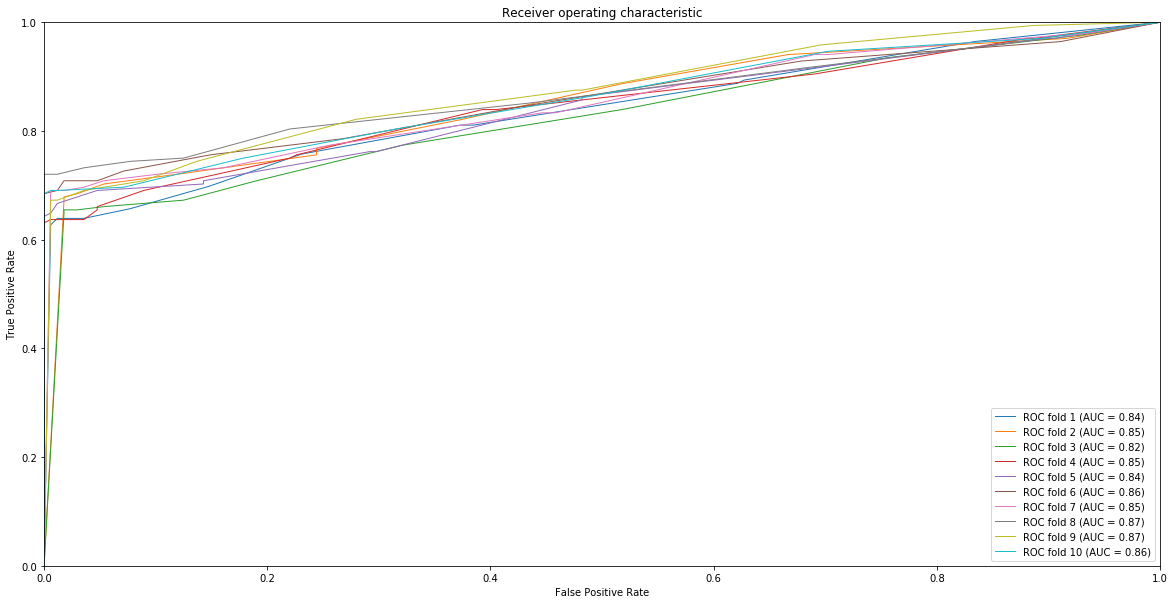

***CROSS VALIDATION***
Extra Trees


{'fit_time': array([0.08596396, 0.13188815, 0.07971096, 0.0726831 , 0.07411981,
        0.07551312, 0.073493  , 0.07054806, 0.07613587, 0.07184577]),
 'score_time': array([0.01707125, 0.01232386, 0.01170516, 0.01109791, 0.00990105,
        0.01029611, 0.01559401, 0.01479983, 0.01054692, 0.0141201 ]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.60160072, 0.60910829, 0.55919045, 0.64096435, 0.66610851,
        0.66859727, 0.62916014, 0.67755707, 0.63212833, 0.64255347]),
 'test_sensitivity_score': array([0.65680473, 0.7202381 , 0.67261905, 0.66071429, 0.69047619,
        0.72619048, 0.7202381 , 0.74404762, 0.70833333, 0.69642857]),
 'test_specificity_score': array([0.92307692, 0.88095238, 0.875     , 0.95238095, 0.95238095,
        0.92857143, 0.89880952, 0.92261905, 0.91071429, 0.92857143])}

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

curves = []

scores = cross_validate(clf, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "Extra Trees CV")
print("***CROSS VALIDATION***")
print("Extra Trees")
scores
#scores['roc']=curves

## ROC Comparisons of all Estimators and Average Precision

In [55]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_curve, auc, matthews_corrcoef, precision_recall_curve, average_precision_score
from imblearn.metrics import sensitivity_score, specificity_score
from scipy import interp

tprs = []
def plt_curve(lst, name):
  plt.figure(figsize=(10,7))
  
  for idx, itm in enumerate(lst):
    fpr, tpr = itm
    tprs.append(interp(np.linspace(0, 1, 100), fpr, tpr))
    tprs[-1][0] = 0.0
#     plt.plot(fpr, tpr, lw=1, label='ROC fold %d (AUC = %0.2f)' % (idx+1, auc(fpr, tpr)))
  plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
         label='Random Guess', alpha=.8)
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(np.linspace(0, 1, 100), mean_tpr)
  std_auc = np.std(aucs)
  plt.plot(mean_fpr, mean_tpr, color='b',
         label='% fold cross validation (AUC = %0.2f)' % (mean_auc),
         lw=2, alpha=.8)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  figName = name + '.png'
  plt.savefig(figName, bbox_inches='tight')
  plt.show()

  
  
def roc_plt(y_true, y_score):
  fpr, tpr, _ = roc_curve(y_true, y_score, pos_label=1)
  curves.append([fpr, tpr])
  return 1

def pr_curve(lst, apLst, name):
  plt.figure(figsize=(10,7))
  
  f_scores = np.linspace(0.2, 0.8, num=4)
  for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.7, y[36] + 0.02))
  
  for idx, itm in enumerate(lst):
    pre, rec = itm
    plt.plot(pre, rec, lw=2, label='Precision-Recall fold %d (AP = %0.2f)' % (idx+1, apLst[idx]))
  plt.ylim([0.0, 1.0])
  plt.xlim([0.0, 1.0])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall')
  plt.legend(loc="lower right")
  figName = name + '.png'
  plt.savefig(figName, bbox_inches='tight')
  plt.show()

  
  
def pr_plt(y_true, y_score):
  precision, recall, _ = precision_recall_curve(y_true, y_score, pos_label=1)
  pr_curves.append([precision, recall])
  return 1

metrs = {
         'roc_plt': make_scorer(roc_plt, needs_proba=True), 
         'pr_plt': make_scorer(pr_plt, needs_proba=True), 
         'average_precision': make_scorer(average_precision_score, needs_proba=True), 
         'matthews_corrcoef': make_scorer(matthews_corrcoef), 
         'sensitivity_score': make_scorer(sensitivity_score), 
         'specificity_score': make_scorer(specificity_score)
        }

***Independent Test***
matthews_corrcoef for XGBoost:  0.1559600033125687

sensitivity_score for XGBoost:  0.11363636363636363

specificity_score for XGBoost:  0.9704433497536946

***Independent Test***
matthews_corrcoef for AdaBoost:  0.16157624674222362

sensitivity_score for AdaBoost:  0.18181818181818182

specificity_score for AdaBoost:  0.9359605911330049

***Independent Test***
matthews_corrcoef for LightGBM:  0.3172505494471144

sensitivity_score for LightGBM:  0.25

specificity_score for LightGBM:  0.9655172413793104

***Independent Test***
matthews_corrcoef for ET:  0.3744746214526692

sensitivity_score for ET:  0.3181818181818182

specificity_score for ET:  0.9605911330049262

***Independent Test***
matthews_corrcoef for MLP:  0.21559414470304922

sensitivity_score for MLP:  0.2727272727272727

specificity_score for MLP:  0.9113300492610837

***Independent Test***
matthews_corrcoef for Random Forest:  0.07600194858013906

sensitivity_score for Random Forest:  0.02272727272727

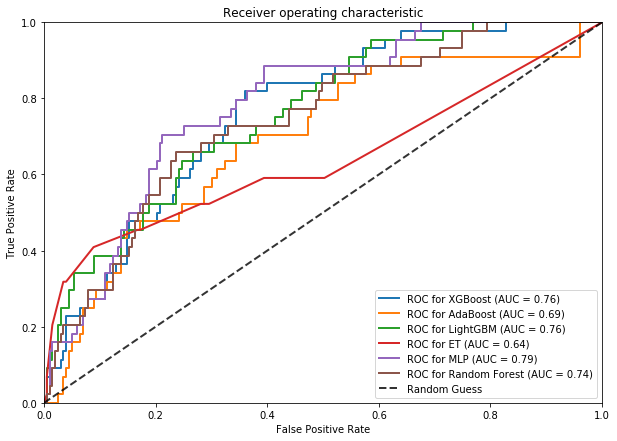

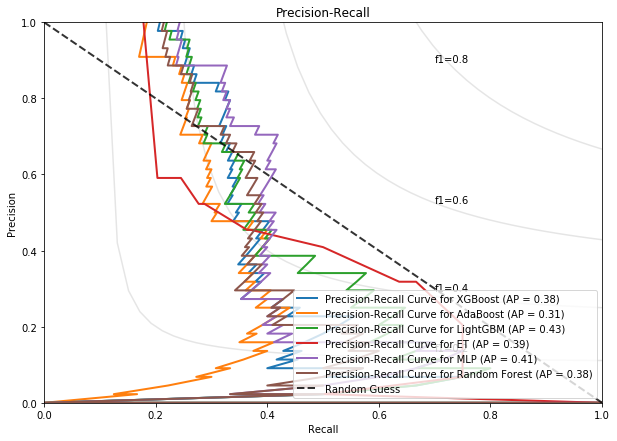

In [56]:
estimators = {
              "XGBoost": XGBClassifier(),
              "AdaBoost": AdaBoostClassifier(n_estimators=300),
              "LightGBM": LGBMClassifier(num_leaves=31, n_estimators=40, learning_rate=0.1),
              "ET": ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0),
              "MLP": MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=1, max_iter=1000, learning_rate='constant', learning_rate_init=0.001),
              "Random Forest": RandomForestClassifier(bootstrap=True,
                        criterion='gini',
                        max_depth=8, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=4, min_samples_split=10,
                        min_weight_fraction_leaf=0.0, n_estimators=300,
                        oob_score=False,
                        random_state=20,
                        verbose=0, warm_start=False)
}

probas_pred = []
avg_pre = []

plt.figure(figsize=(10,7))

for key, clf in estimators.items():
  clf.fit(X_train_res, y_train_res)
  y_pred = clf.predict(X_test)
  y_score = clf.predict_proba(X_test)
  probas_pred.append(y_score)
  avg_pre.append(average_precision_score(y_test, y_score[:, 1], pos_label=1))

  fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
  
  plt.plot(fpr, tpr, lw=2, label='ROC for %s (AUC = %0.2f)' % (key, auc(fpr, tpr)))
  print("***Independent Test***")
  mat_cor_coef = matthews_corrcoef(y_test, y_pred)
  print("matthews_corrcoef for " + key + ": ", mat_cor_coef)
  print()

  sen_scr = sensitivity_score(y_test, y_pred)
  print("sensitivity_score for " + key + ": ", sen_scr)
  print()

  spe_scr = specificity_score(y_test, y_pred)
  print("specificity_score for " + key + ": ", spe_scr)
  print()
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
       label='Random Guess', alpha=.8)   
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
figName = "Compare_All_ROC" + '.png'
plt.savefig(figName, bbox_inches='tight')
plt.show()


plt.figure(figsize=(10,7))

f_scores = np.linspace(0.2, 0.8, num=4)
for f_score in f_scores:
  x = np.linspace(0.01, 1)
  y = f_score * x / (2 * x - f_score)
  l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
  plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.7, y[36] + 0.02))

keyZ = list(estimators.keys())
for idx, y_score in enumerate(probas_pred):
  pre, rec, _ = precision_recall_curve(y_test, y_score[:, 1], pos_label=1)
  
  plt.plot(pre, rec, lw=2, label='Precision-Recall Curve for %s (AP = %0.2f)' % (keyZ[idx], avg_pre[idx]))
plt.plot([1, 0], [0, 1], linestyle='--', lw=2, color='black',
       label='Random Guess', alpha=.8)  
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.legend(loc="lower right")
figName = "Compare_All_Precision-Recall" + '.png'
plt.savefig(figName, bbox_inches='tight')
plt.show()

## Cross Validation Curve

XGBClassifier
Accuracy: 82.7189 %
auROC: 0.892395
auPR: 0.9214
F1-score: 0.8036
MCC: 0.6741
Recall: 0.7079
Sensitivity (+): 70.7912 %
Specificity (-): 94.6460 %
Confusion Matrix:
[[1591   90]
 [ 491 1190]]
_______________________________________
AdaBoostClassifier
Accuracy: 80.2488 %
auROC: 0.877022
auPR: 0.9131
F1-score: 0.7941
MCC: 0.6074
Recall: 0.7626
Sensitivity (+): 76.2641 %
Specificity (-): 84.2356 %
Confusion Matrix:
[[1416  265]
 [ 399 1282]]
_______________________________________
LGBMClassifier
Accuracy: 81.4677 %
auROC: 0.879455
auPR: 0.9134
F1-score: 0.7933
MCC: 0.6432
Recall: 0.7121
Sensitivity (+): 71.2076 %
Specificity (-): 91.7311 %
Confusion Matrix:
[[1542  139]
 [ 484 1197]]
_______________________________________
ExtraTreesClassifier
Accuracy: 81.4693 %
auROC: 0.845136
auPR: 0.8845
F1-score: 0.7914
MCC: 0.6460
Recall: 0.7049
Sensitivity (+): 70.4938 %
Specificity (-): 92.4450 %
Confusion Matrix:
[[1554  127]
 [ 496 1185]]
_______________________________________
MLP

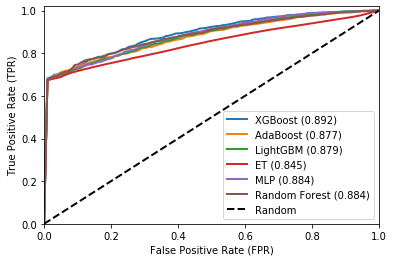

In [57]:
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier, XGBRFRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_curve, auc, matthews_corrcoef, precision_recall_curve, average_precision_score
from imblearn.metrics import sensitivity_score, specificity_score
from scipy import interp

def auROCplot():
    ### auROC ###
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='Random')
    plt.xlim([0.0, 1.00])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    # plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')

    plt.savefig('cvAuROC.png', dpi=100)
    plt.show()
    ### --- ###

    
def runAll(X, y):
    Names = []
    Classifiers = []
    estimators = {
              "XGBoost": XGBClassifier(),
              "AdaBoost": AdaBoostClassifier(n_estimators=300),
              "LightGBM": LGBMClassifier(num_leaves=31, n_estimators=40, learning_rate=0.1),
              "ET": ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0),
              "MLP": MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=1, max_iter=1000, learning_rate='constant', learning_rate_init=0.001),
              "Random Forest": RandomForestClassifier(bootstrap=True,
            criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300,
            oob_score=False,
            random_state=20,
            verbose=0, warm_start=False)
}

    for key, value in estimators.items():
        Names.append(key)
        Classifiers.append(value)

    Results = []  # compare algorithms

    from sklearn.metrics import accuracy_score, \
        confusion_matrix, \
        roc_auc_score,\
        average_precision_score,\
        roc_curve, f1_score, recall_score, matthews_corrcoef, auc

    # Step 05 : Spliting with 10-FCV :
    from sklearn.model_selection import StratifiedKFold

    cv = StratifiedKFold(n_splits=10, shuffle=True)

    for classifier, name in zip(Classifiers, Names):

        accuray = []
        auROC = []
        avePrecision = []
        F1_Score = []
        AUC = []
        MCC = []
        Recall = []

        mean_TPR = 0.0
        mean_FPR = np.linspace(0, 1, 100)

        CM = np.array([
            [0, 0],
            [0, 0],
        ], dtype=int)

        print(classifier.__class__.__name__)

        model = classifier
        for (train_index, test_index) in cv.split(X, y):

            X_train = X[train_index]
            X_test = X[test_index]

            y_train = y[train_index]
            y_test = y[test_index]

            model.fit(X_train, y_train)


            # Calculate ROC Curve and Area the Curve
            y_proba = model.predict_proba(X_test)[:, 1]
            FPR, TPR, _ = roc_curve(y_test, y_proba)
            mean_TPR += np.interp(mean_FPR, FPR, TPR)
            mean_TPR[0] = 0.0
            roc_auc = auc(FPR, TPR)
            ##########################################
            # print(FPR)
            # print(TPR)
            ##########################################

            y_artificial = model.predict(X_test)

            auROC.append(roc_auc_score(y_test, y_proba))

            accuray.append(accuracy_score(y_pred=y_artificial, y_true=y_test))
            avePrecision.append(average_precision_score(y_test, y_proba)) # auPR
            F1_Score.append(f1_score(y_true=y_test, y_pred=y_artificial))
            MCC.append(matthews_corrcoef(y_true=y_test, y_pred=y_artificial))
            Recall.append(recall_score(y_true=y_test, y_pred=y_artificial))
            AUC.append(roc_auc)

            CM += confusion_matrix(y_pred=y_artificial, y_true=y_test)

        accuray = [_*100.0 for _ in accuray]
        Results.append(accuray)

        mean_TPR /= cv.get_n_splits(X, y)
        mean_TPR[-1] = 1.0
        mean_auc = auc(mean_FPR, mean_TPR)
        plt.plot(
            mean_FPR,
            mean_TPR,
            linestyle='-',
            label='{} ({:0.3f})'.format(name, mean_auc), lw=2.0)

        print('Accuracy: {0:.4f} %'.format(np.mean(accuray)))
        # print('auROC: {0:.6f}'.format(np.mean(auROC)))
        print('auROC: {0:.6f}'.format(mean_auc))
        print('auPR: {0:.4f}'.format(np.mean(avePrecision))) # average_Precision
        print('F1-score: {0:.4f}'.format(np.mean(F1_Score)))
        print('MCC: {0:.4f}'.format(np.mean(MCC)))
        # print('average_AUC:', np.mean(AUC))
        # tn, fp, fn, tp = CM.ravel()
        TN, FP, FN, TP = CM.ravel()
        print('Recall: {0:.4f}'.format( np.mean(Recall)) )
        # print('AUC: {0:.4f}'.format( np.mean(AUC)) )
        print('Sensitivity (+): {0:.4f} %'.format( float( (TP) / (TP + FN) )*100.0 ))
        print('Specificity (-): {0:.4f} %'.format( float( (TN) / (TN + FP) )*100.0 ))
        print('Confusion Matrix:')
        print(CM)

        print('_______________________________________')

    ### auROC Curve ###
    auROCplot()

    
runAll(X_train_res, y_train_res)

In [58]:
##P-values of Beta Coefficients